# The Indian Start-up Ecosytem

### Installations

In [1]:
# %pip install seaborn
# %pip install plotly --upgrade

### Importation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [3]:
data_2018 =  pd.read_csv('data/startup_funding2018.csv')
data_2019 =  pd.read_csv('data/startup_funding2019.csv')
data_2020 =  pd.read_csv('data/startup_funding2020.csv')
data_2021 =  pd.read_csv('data/startup_funding2021.csv')

## Hypothesis and Questions


Ho = Funding is not dependent on industry/sector.

Ha = Funding is highly dependent on the industry/sector a company is in.




1. What industry received the most funding?
2. Which locations receives more funding?
3. In which year is funding the highest?
4. How many compnies received funding above $100,000,000 and what industry are they in?
5. For companies in the pre-seed stage of funding, how much is the average pre-seed amount, and what industry are they in?

## Exploratory Data Analysis

In [4]:
data_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

Change 2018 columns to match column specified in the project

In [5]:
data_2018.rename(columns={
    'Company Name':'Company/Brand',
    'Industry':'Sector',
    'About Company':'What it does',
    'Amount':'Amount($)',
    'Location':'HeadQuarter',
    'Round/Series':'Stage',
}, inplace=True)

In [6]:
data_2018.columns

Index(['Company/Brand', 'Sector', 'Stage', 'Amount($)', 'HeadQuarter',
       'What it does'],
      dtype='object')

In [7]:
data_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [8]:
data_2018['Founders'] = np.nan
data_2018['Investor'] = np.nan
data_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN


In [9]:
data_2018.columns

Index(['Company/Brand', 'Sector', 'Stage', 'Amount($)', 'HeadQuarter',
       'What it does', 'Founders', 'Investor'],
      dtype='object')

#### Dropping all Founded columns since it is not required for the project

In [10]:
data_2019.drop(columns='Founded', inplace=True)
data_2020.drop(columns='Founded', inplace=True)
data_2021.drop(columns='Founded', inplace=True)
data_2020.drop(columns='Unnamed: 9', inplace=True)


##### I want to track the year a company was funded to accurately answer my hypothesis question

In [11]:
data_2018['Year'] = '2018'
data_2019['Year'] = '2019'
data_2020['Year'] = '2020'
data_2021['Year'] = '2021'

In [12]:
data_2019.columns

Index(['Company/Brand', 'HeadQuarter', 'Sector', 'What it does', 'Founders',
       'Investor', 'Amount($)', 'Stage', 'Year'],
      dtype='object')

In [13]:
data_2020.columns

Index(['Company/Brand', 'HeadQuarter', 'Sector', 'What it does', 'Founders',
       'Investor', 'Amount($)', 'Stage', 'Year'],
      dtype='object')

In [14]:
data_2021.columns

Index(['Company/Brand', 'HeadQuarter', 'Sector', 'What it does', 'Founders',
       'Investor', 'Amount($)', 'Stage', 'Year'],
      dtype='object')

Merging all my different dataframes

In [15]:
dataframes = [data_2018, data_2019, data_2020, data_2021]

data = pd.concat(dataframes, ignore_index=True)
data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,2018


In [16]:
data.describe()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year
count,2879,2861,1941,2873,2765,2879,2334,2253,2879
unique,2214,873,75,699,172,2691,1980,1777,4
top,BharatPe,FinTech,Seed,Undisclosed,Bangalore,BYJU'S is an educational technology company th...,Byju Raveendran,Inflection Point Ventures,2021
freq,10,173,606,298,764,5,7,36,1209


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2879 non-null   object
 1   Sector         2861 non-null   object
 2   Stage          1941 non-null   object
 3   Amount($)      2873 non-null   object
 4   HeadQuarter    2765 non-null   object
 5   What it does   2879 non-null   object
 6   Founders       2334 non-null   object
 7   Investor       2253 non-null   object
 8   Year           2879 non-null   object
dtypes: object(9)
memory usage: 202.6+ KB


In [18]:
data.duplicated().sum()

23

In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.duplicated().sum()

0

In [21]:
data.isna().sum()

Company/Brand      0
Sector            18
Stage            929
Amount($)          6
HeadQuarter      114
What it does       0
Founders         544
Investor         624
Year               0
dtype: int64

Let's Start with the Amount($) column

- Checking for uniques values

In [22]:
data['Amount($)'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

#### Engineering a feature 'Original Currency' to track on what rows the conversion of the currencies should be done 

##### Asumptions

1. Each value in the amount column if it has a symbol, belongs to that currency
2. If value has no symbol and length of (value - symbol) > 11, then that value is in Rupees
3. Conversion rate been used is middle of the year 30th June 2018 


In [23]:
data['Amount($)'] = data['Amount($)'].str.strip()
data['Amount($)'] = data['Amount($)'].apply(lambda x: str(x).replace(',', ''))
data['Original Currency'] = data['Amount($)'].apply(lambda x: 'Rupees' if '₹' in x or ('$' not in x and len(x) > 11) else 'Dollars')
data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year,Original Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,2018,Dollars
1,Happy Cow Dairy,"Agriculture, Farming",Seed,₹40000000,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,2018,Rupees
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,₹65000000,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,2018,Rupees
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,2018,Dollars
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,2018,Dollars


In [24]:
def clean_amount():
    data['Amount($)'] = data['Amount($)'].astype(str)
    data['Amount($)'] = data['Amount($)'].apply(lambda x: str(x).replace('$', ""))
    data['Amount($)'] = data['Amount($)'].apply(lambda x: str(x).replace('₹', ''))
    data['Amount($)'] = data['Amount($)'].apply(lambda x: '—' if re.search('osed|n', x) else x)
    data['Amount($)'] = data['Amount($)'].apply(lambda x: str(x).replace('—', '0'))
    data['Amount($)'] = data['Amount($)'].apply(lambda x: str(x).replace(',', ""))
    data['Amount($)'] = data['Amount($)'].apply(lambda x: str(x).replace(' ', ""))
    data['Amount($)'] = pd.to_numeric(data['Amount($)'], errors='coerce')
    data['Amount($)'] = data['Amount($)'].astype(float)
    

clean_amount()
data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year,Original Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,2018,Dollars
1,Happy Cow Dairy,"Agriculture, Farming",Seed,40000000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,2018,Rupees
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,65000000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,2018,Rupees
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,2018,Dollars
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,2018,Dollars


In [25]:
coerced_values = data['Amount($)'].isna().sum()
percentage = (coerced_values/data.shape[0]) * 100

print(f'{percentage:.2f}% of our data is missing in the Amount column')

#Not bad

0.28% of our data is missing in the Amount column


##### We now convert the values that were tracked as rupees to dollars

In [26]:
exchange_rate = 0.0146
my_condition = data['Original Currency'] == 'Rupees'
data.loc[my_condition, 'Amount($)'] = data.loc[my_condition, 'Amount($)'] * exchange_rate

data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year,Original Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,2018,Dollars
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,2018,Rupees
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,2018,Rupees
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,2018,Dollars
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,2018,Dollars


##### Now let's delete the 'original currency' column. It has served its purpose

In [27]:
data.drop(columns='Original Currency', inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2856 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2856 non-null   object 
 1   Sector         2838 non-null   object 
 2   Stage          1927 non-null   object 
 3   Amount($)      2848 non-null   float64
 4   HeadQuarter    2742 non-null   object 
 5   What it does   2856 non-null   object 
 6   Founders       2312 non-null   object 
 7   Investor       2232 non-null   object 
 8   Year           2856 non-null   object 
dtypes: float64(1), object(8)
memory usage: 223.1+ KB


#### Now to deal with the HeadQuarters with multiple locations

Goal

- Create a helper function to clean up the headquaters column

Assumption

1. The first place listed is the principal headquaters
2. Since the entire dataset is about India, India can be dropped as well


Note 

- We have 114 null headquaters
- Let's check the headquaters uniques values




In [29]:
data['HeadQuarter'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [30]:
data['HeadQuarter'] = data['HeadQuarter'].apply(str)
data['HeadQuarter'].str.lower()

null_headquaters = data[data['HeadQuarter'] == 'nan']
null_count = null_headquaters.shape[0]
null_percentage = (null_count/data.shape[0]) * 100

print(f'Total nan values in the heaquaters column is {null_count}')
print(f'This is {null_percentage:.2f}% of the heaquaters data')

Total nan values in the heaquaters column is 114
This is 3.99% of the heaquaters data


Now I will convert the nan string to something like 'Headquaters unknown'. 

In [31]:
filter1 = data['HeadQuarter'] == 'nan'

data.loc[filter1, 'HeadQuarter'] = 'Headquaters unknown'

In [32]:
def remove_excess_headquaters(string):
    new = []
    for letter in string:
        new += letter
    if ',' in new:
        comma_index = new.index(',')
        del new[comma_index:len(string)]
    elif '#' in new:
        hash_index = new.index('#')
        del new[hash_index -2:len(string)]
    headquaters = ''.join(new)
    return headquaters
    
data['HeadQuarter'] = data['HeadQuarter'].apply(remove_excess_headquaters)
data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,NaN,NaN,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,NaN,NaN,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,NaN,NaN,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,NaN,2018


In [33]:
data.isna().sum()

Company/Brand      0
Sector            18
Stage            929
Amount($)          8
HeadQuarter        0
What it does       0
Founders         544
Investor         624
Year               0
dtype: int64

### Clean up the Sector column

My Goal

1. Create a function that adds specific keywords or expression into my predefined list

Goals 
1. There are nan and '-' that should be handled first. 
2. The goal is to replace those values with what the company does, this way we have some keywords to use to gauge what sector the company is in
3. Changing industries that are just have consumer to 'Business Consumer upon further investigation(regex purpose)



##### Lets first visualize the Sector column

In [34]:
data['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

Imputing all nan and  - column with what the company does so we can guess based on the keywords

In [35]:
data['Sector'] = data['Sector'].apply(str)
data['Sector'] = data['Sector'].str.lower()

condition_1 = (data['Sector'] == 'nan') | (data['Sector'] == '—')
data.loc[condition_1, 'Sector'] = data.loc[condition_1, 'What it does']
data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year
0,TheCollegeFever,"brand marketing, event promotion, marketing, s...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,2018
1,Happy Cow Dairy,"agriculture, farming",Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,NaN,NaN,2018
2,MyLoanCare,"credit, financial services, lending, marketplace",Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,NaN,NaN,2018
3,PayMe India,"financial services, fintech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,NaN,NaN,2018
4,Eunimart,"e-commerce platforms, retail, saas",Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,NaN,2018


- Dealing with the multiple sector column to make it a little bit more concise
- I will create a function and use the re module to search for specific key words for  a particluar industry/sector


In [36]:
# for a more efficient regex grouping convert some more brief sector names

data['Sector'] = data['Sector'].str.lower()
data['Sector'] = data['Sector'].apply(lambda x: 'business consumer' if x == 'consumer' else x)
data['Sector'] = data['Sector'].apply(lambda x: 'e-vehicle' if x == 'ev' else x)
data['Sector'] = data['Sector'].apply(lambda x: 'tech' if x == 'it' else x)

def sector_redistribution(sector):
    if re.search('bank|fintech|finance|crypto|account|credit|venture|crowd|blockchain|fund|lending|financial|'
                 'trading|wealth|insurance|remittance|money|wealth|equity|investment|mortgage|financial services|'
                 'nft|payments', sector):
        return 'Finance'
    elif re.search(r'automotive|air transport|transport|logistics|vehicle|transportation|'
                   r'aviation|vehicles|tyre|fleet|wheels|aero|mobility|aeorspace|wl & rac protection|'
                   r'micro-mobiity|delivery service', sector):
        return 'Transport'
    elif re.search(r'clean energy|energy|boil &|\boil\b|solar|electricity|environment', sector):
        return 'Energy'
    elif re.search(r'analytics|consulting|human|career|\berp\b|advertising|advertisement|market research|'
                   r'entrepre|recruit|\bhr\b|working|sultancy|advisory|work|job|management|skill|legal|'
                   r'crm|specific domain to individuals|information services', sector):
        return 'Business Intelligence'
    elif re.search('beauty|cosmetic|skincare|fashion|wear|cosmetics|textiles|eyewear|jewellery|cloth|eyeglasses', 
                   sector):
        return 'Beauty & Fashion'
    elif re.search('decor|fitness|training|wellness|personal care|deisgn|craft|design|podcast|'
                   'lifestyle|spiritual|matrimony|living|cultural|home', sector):
        return 'LifeStyle'
    elif re.search('edutech|education|learn|edtech', sector):
        return 'Education'
    elif re.search(r'beverage|catering|cook|food|restaurants', sector):
        return 'Food & Beverages'
    elif re.search('sports|esports|game|ball|player|manchester', sector):
        return 'Sports'
    elif re.search('customer|hospital|tourism|events|weedding|travel|hosts|booking|wedding|qsr', sector):
        return 'Hospitality'
    elif re.search('2|trade|enterpise|commerce|business|commercial|consumer goods|Marketplace|'
                   'business consumer|marketing|retail|market|store|furniture|wholesale|wine & spirits|'
                   'multinational|e-|packaging|sales|tplace|warehouse|fm|product|merchandise|reatil|'
                   'conglomerates|invoice discounting|supply chain|car service|service industry|'
                   'company-as-a-service|consumer service|facilities support services|'
                   'facilities services', sector):
        return 'Commerce'
    elif re.search('dental|health|health insurance|medic|supplement|biopharma|veterinary|'
                   'pharma|heathcare|nutrition|hygiene|care|sanitation|bio|cannabis|tobacco|sciences', sector):
        return 'Health'
    elif re.search('agri|biotechnology|Industrial|farming|fish|milk|diary|dairy|dairy startup', sector):
        return 'Agriculture'
    elif re.search('battery|manufacturing|electronics|industrial automation|aerospace|conductor|'
                   'gaming|robotics|engineering|mechanical|appliance|automation|ev startup|'
                   'startup laboratory|e-vehicle|luxury car', sector):
        return 'Manufacturing'
    elif re.search('communities|smart cities|government|classifieds|community|water|defense|'
                   'pollution|translation & localization|taxation|maritime', sector):
        return 'Government'
    elif re.search('media|dating|music|audio|gaming|creative|entertainment|broadcasting|video|'
                   'blogging|content|celebrity|ott', sector):
        return 'Media & Entertainment'
    elif re.search('apartment|real estate|home|interior|construction|rental|housing|accomodation|hauz', sector):
        return 'Real Estate'
    elif re.search('telecom|news|escrow|publication', sector):
        return 'Telecommunications'
    elif re.search(r'artificial intelligence|tech|cloud|artificial|data|internet|things|apps|android|software|'
                r'computer|mobile|3d printing|funding platform|applications|file|embedded systems|'
                r'portals|fraud detection|search engine|nanotechnology|security|saas|\bit company\b|'
                r'augmented reality|drone|ar startup|]\baas\b|app|/|virtual|it startup|'
                r'photonics|e tailor|\bai\b|ai & debt|ai company|ai chatbot|iot startup|ai startup|\biot\b|'
                r'\bsocial platform\b|\bar platform\b|\bapi platform\b|\bmlops platform\b|online storytelling|'
                r'\bdigital platform\b|paas startup|taas startup|digital assistant',sector):
        return 'Technology'
    else:
        return sector
    

data['Sector'] = data['Sector'].apply(sector_redistribution)

In [37]:
data['Sector'].unique()

array(['Commerce', 'Agriculture', 'Finance', 'Technology',
       'Business Intelligence', 'Food & Beverages', 'Manufacturing',
       'Transport', 'Hospitality', 'Telecommunications', 'Education',
       'Beauty & Fashion', 'Energy', 'LifeStyle', 'Media & Entertainment',
       'Health', 'Sports', 'Government', 'Real Estate'], dtype=object)

In [38]:
data['Sector'].unique().shape

(19,)

In [40]:
data['Sector'].unique().shape

(19,)

### Clean up stage column

I will be using the common finance stages used in business with a few assumptions 

Assumptions

- Pre-Seed :  Pre-seed and non equity assistance 
- Angel : angel investors 
- Seed : Every stage that contains a digit is also in the seed stage
- Pre-Series : This refers to the stage between the seed round and the series A round
- Series A : Series A
- Series B : Series B
- Series C : Series C
- Later Stage : Any stage beyound C that is not grant or equity
- Grant : Grant
- Equity : Equity

In [42]:
data['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B',
       'Bridge', 'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed

In [43]:
data['Stage'] = data['Stage'].apply(str)
data['Stage'] = data['Stage'].str.lower()

seed_condition = data['Stage'] == 'seed'
data.loc[seed_condition, 'Stage'] = 'Seed'

In [44]:
data['Stage'] = data['Stage'].apply(str)
def categorize_stage(stage):
    if re.search('angel', stage):
        return 'Angel'
    elif re.search('seed stage|seed round|seed\+|\d|funding round|seed investment|seed fund', stage):
        return 'Seed'
    elif re.search('non-equity assistance|pre-seed|early', stage):
        return 'Pre-Seed'
    elif re.search('bridge|pre-series', stage):
        return 'Pre-Series'
    elif re.search('series a|seies a|pre-series b|seed a', stage):
        return 'Series A'
    elif re.search('series b|b3|b2|series b\+|mid series', stage):
        return 'Series B'
    elif re.search('series c', stage):
        return 'Series C'
    elif re.search('grant', stage):
        return 'Grant'
    elif re.search('pe|private equity|secondary market', stage):
        return 'Equity'
    elif re.search('post-ipo equity|b3|h|f2|e2|d1|f1|series f1|series g|series f|series e|series i|series d|edge|corporate round', stage):
        return 'Later Stage'
    elif re.search('debt', stage):
        return 'Debt Financing'
    elif re.search('^\$$|https|nan|unknown|undisclosed', stage):
        return 'Unknown Stage'
    else:
        return stage
    
data['Stage'] = data['Stage'].apply(categorize_stage)

In [45]:
data['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed', 'Equity',
       'Unknown Stage', 'Grant', 'Debt Financing', 'Later Stage',
       'Series C', 'Pre-Series'], dtype=object)

Making sure all categorical columns are in string format

 - First we have to make sure that all Nan values are changed to human understandable word like Unknown, for the investor and Founder columns.
 - We will need this for analysis instead of just droping it
 - Remember that NaN values will become 'nan' strings 
   - I will apply the lower() method for easy manipulation

In [46]:
data[data['Stage'] == 'Unknown Stage']

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year
94,Rays Power Infra,Energy,Unknown Stage,29200000.0,Jaipur,Rays Power Infra is a leading integrated Solar...,NaN,NaN,2018
106,Vivriti Capital,Finance,Unknown Stage,28500000.0,Chennai,Vivriti Capital is an online platform for inst...,NaN,NaN,2018
118,SEDEMAC Mechatronics,Transport,Unknown Stage,0.0,Mumbai,SEDEMAC Mechatronics is technology company tha...,NaN,NaN,2018
119,MadGuy Labs,Education,Unknown Stage,150000.0,Hyderabad,MadGuy Labs is a Online Test-prep Platform.,NaN,NaN,2018
131,Wakefit,Commerce,Unknown Stage,9490000.0,Bangalore,Wakefitkart is a mattress manufacturing compan...,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...
2842,Peppermint,Manufacturing,Unknown Stage,600000.0,Pune,Intelligent Housekeeping Robots for public and...,"Runal Dahiwade, Miraj C Vora","Venture Catalysts, Indian Angel Network",2021
2852,Sugar.fit,Health,Unknown Stage,10000000.0,Bangalore,"Innovative technology, compassionate diabetes ...","Shivtosh Kumar, Madan Somasundaram","Cure.fit, Endiya Partners, Tanglin Venture",2021
2862,Geniemode,Commerce,Unknown Stage,2000000.0,Gurugram,Transforming global sourcing for retailers & s...,"Amit Sharma, Tanuj Gangwani",Info Edge Ventures,2021
2863,Sapio Analytics,Technology,Unknown Stage,0.0,Mumbai,Sapio helps government create policies driven ...,"Hardik Somani, Ashwin Srivastava, Shripal Jain...","Rachit Poddar, Rajesh Gupta",2021


In [47]:
data.isna().sum()

Company/Brand      0
Sector             0
Stage              0
Amount($)          8
HeadQuarter        0
What it does       0
Founders         544
Investor         624
Year               0
dtype: int64

In [48]:
data['Founders'] = data['Founders'].apply(str)
data['Investor'] = data['Investor'].apply(str)
data['Founders'] = data['Founders'].str.lower()
data['Investor'] = data['Investor'].str.lower()

founder_filter = data['Founders'] == 'nan'
investor_filter = data['Investor'] == 'nan'

data.loc[founder_filter, 'Founders'] = 'Founder Unknown'
data.loc[investor_filter, 'Investor'] = 'Investor Unknown'

Now we will have no null values instead it will be unknown

1. Let's change the types of the company and What is does data type to string just to be safe
2. I will also change the case of founders back to tile case since they contain human names #proper_nouns  #respect

In [49]:
data['Company/Brand'] = data['Company/Brand'].apply(str)
data['What it does'] = data['What it does'].apply(str)
data['Investor'] = data['Investor'].str.title()

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2856 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2856 non-null   object 
 1   Sector         2856 non-null   object 
 2   Stage          2856 non-null   object 
 3   Amount($)      2848 non-null   float64
 4   HeadQuarter    2856 non-null   object 
 5   What it does   2856 non-null   object 
 6   Founders       2856 non-null   object 
 7   Investor       2856 non-null   object 
 8   Year           2856 non-null   object 
dtypes: float64(1), object(8)
memory usage: 223.1+ KB


In [51]:
data.isna().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        8
HeadQuarter      0
What it does     0
Founders         0
Investor         0
Year             0
dtype: int64

The only columns we have that are missing are the coerce values when converting the amount column into float. Neat

#### Now, let's run do some testing but first, let's see the fruits of our labour


In [52]:
data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founders,Investor,Year
0,TheCollegeFever,Commerce,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",Founder Unknown,Investor Unknown,2018
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,Founder Unknown,Investor Unknown,2018
2,MyLoanCare,Finance,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,Founder Unknown,Investor Unknown,2018
3,PayMe India,Finance,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,Founder Unknown,Investor Unknown,2018
4,Eunimart,Commerce,Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,Founder Unknown,Investor Unknown,2018


I will be using Anova in this example since I have more than 2 classes in my Sector column. 19 to be precise. Let's verify

In [53]:
data['Sector'].unique()

array(['Commerce', 'Agriculture', 'Finance', 'Technology',
       'Business Intelligence', 'Food & Beverages', 'Manufacturing',
       'Transport', 'Hospitality', 'Telecommunications', 'Education',
       'Beauty & Fashion', 'Energy', 'LifeStyle', 'Media & Entertainment',
       'Health', 'Sports', 'Government', 'Real Estate'], dtype=object)

In [54]:
data['Sector'].unique().shape

(19,)

 First, remember that we have about 8 missing values in the Amounts column. We have to drop this to we can get our test score

In [55]:
data['Amount($)'].isna().any()

True

In [56]:
data.dropna(subset=['Amount($)'], inplace=True)

In [57]:
data['Amount($)'].value_counts()

0.0          550
1000000.0    167
2000000.0    116
3000000.0     81
5000000.0     80
            ... 
1080000.0      1
4050000.0      1
682000.0       1
410000.0       1
6200000.0      1
Name: Amount($), Length: 511, dtype: int64

In [58]:
data['Amount($)'].isna().any()

False

In [74]:
# Let's create the groups 

sector_and_amount = data.groupby('Sector')['Amount($)']

all_industries = ['Commerce', 'Agriculture', 'Finance', 'Technology', 'Food & Beverages','Education', 
                'Business Intelligence', 'Transport', 'Manufacturing','Energy', 'LifeStyle', 'Hospitality', 
                'Health', 'Sports','Beauty & Fashion', 'Real Estate', 'Media & Entertainment',
                'Government', 'Telecommunications']

industry_amounts = {industry: sector_and_amount.get_group(industry) for industry in all_industries}


# Calculate ANOVA
f_stat, p_value = stats.f_oneway(*industry_amounts.values())

print(f"The F-Stat is {f_stat}")
print(f"The P-Value is {p_value}")



The F-Stat is 0.8762059640441741
The P-Value is 0.6084324474975085


Well, that is a no brainer. It looks like we have failed to reject the null hypothesis that 'Funding is not dependent on industry'.

 - Our P-value is about 64%

Now, let's answer the questions we had.

#### Question 1. What industry received the most funding?

In [60]:
data['Amount($)'].isna().sum()

#Changing data type from float to make it more relatable
data['Amount($)'] = data['Amount($)'].astype(int)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2848 non-null   object
 1   Sector         2848 non-null   object
 2   Stage          2848 non-null   object
 3   Amount($)      2848 non-null   int32 
 4   HeadQuarter    2848 non-null   object
 5   What it does   2848 non-null   object
 6   Founders       2848 non-null   object
 7   Investor       2848 non-null   object
 8   Year           2848 non-null   object
dtypes: int32(1), object(8)
memory usage: 211.4+ KB


In [62]:
top_sectors = data[['Sector', 'Amount($)']].groupby('Sector').sum().sort_values(by='Amount($)', ascending=False).head(7)
top_sectors

,Amount($)
Sector,
Education,6190497290
Finance,6090120959
Transport,5324423982
Food & Beverages,4244698000
Technology,3211033014
Health,2227782995
Media & Entertainment,2188893740


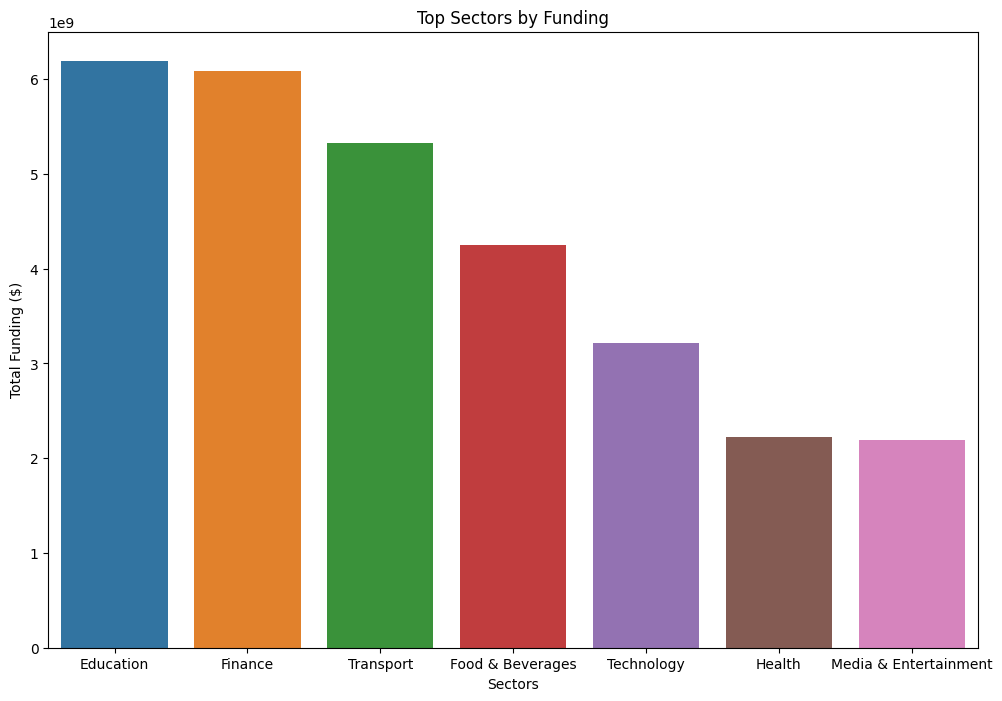

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_sectors.index, y='Amount($)', data=top_sectors)
plt.title('Top Sectors by Funding')
plt.xlabel('Sectors')
plt.ylabel('Total Funding ($)')
plt.show()

#### Question 2. Which locations receive more funding?

<Figure size 1200x600 with 0 Axes>

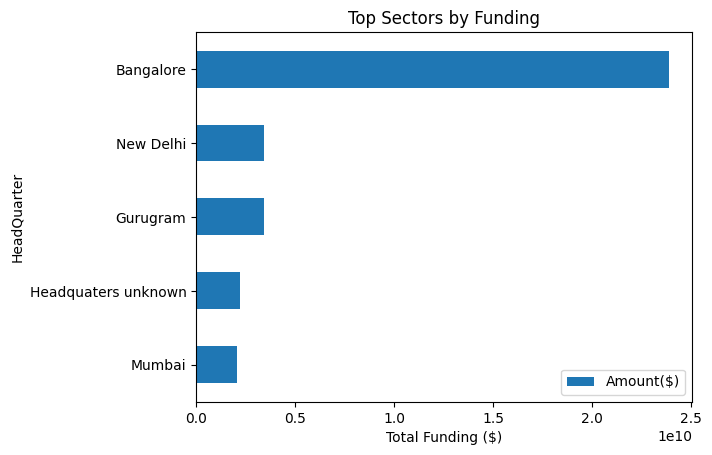

In [64]:
location = data[['HeadQuarter', 'Amount($)']].groupby('HeadQuarter').sum().sort_values(by='Amount($)', ascending=True).tail(5)
plt.figure(figsize=(12, 6))
location.plot(kind='barh')
plt.title('Top Sectors by Funding')
plt.ylabel('HeadQuarter')
plt.xlabel('Total Funding ($)')
plt.show()

#### Question 3. In which year is funding the highest?

<Figure size 1200x600 with 0 Axes>

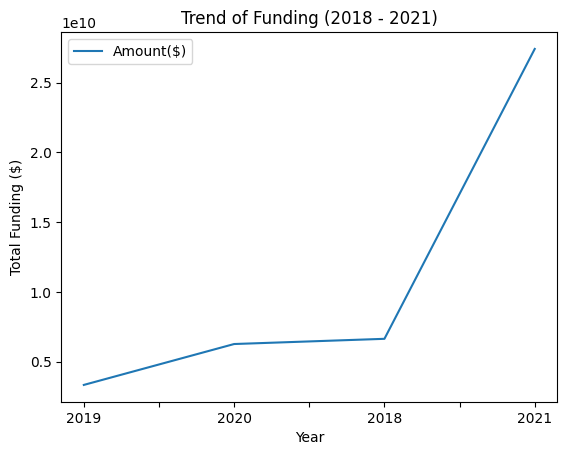

In [65]:
highest_funding = data[['Year', 'Amount($)']].groupby('Year').sum().sort_values(by='Amount($)',ascending=True)

plt.figure(figsize=(12, 6))
highest_funding.plot(kind='line')
plt.title('Trend of Funding (2018 - 2021)')
plt.ylabel('Total Funding ($)')
plt.show()

#### Question 4. How many companies received funding above $100,000,000?

In [66]:
hundred_million_filter = data['Amount($)'] > 100000000
# condition_1

hundred_million = data.loc[hundred_million_filter, ['Company/Brand','Amount($)']].groupby('Company/Brand').sum().sort_values('Amount($)', ascending=False).head(5)
                                                                                                                                                               
new = hundred_million.sort_values(by='Amount($)', ascending=False).head()
new

,Amount($)
Company/Brand,
Swiggy,1913000000
VerSe Innovation,1450000000
BYJU'S,1260000000
Dream Sports,1240000000
Zomato,1020000000


<Figure size 1200x600 with 0 Axes>

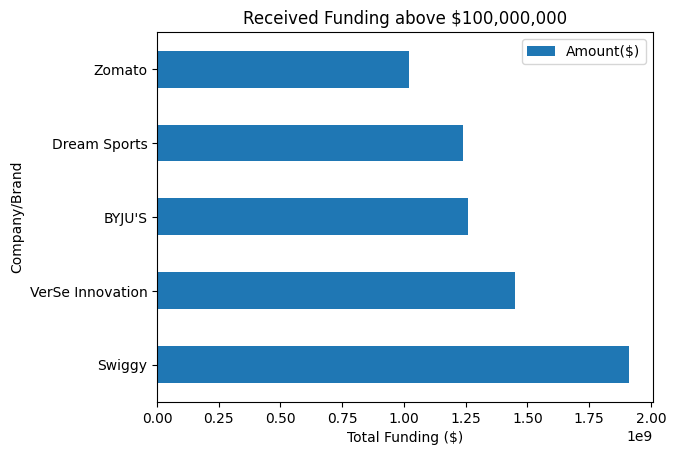

In [67]:
plt.figure(figsize=(12, 6))
new.plot(kind='barh')
plt.title('Received Funding above $100,000,000')
plt.xlabel('Total Funding ($)')
plt.show()

#### Question 5. For companies in the pre-seed stage of funding, how much is the average pre-seed amount, and what industry are they in?

In [68]:
pre_seed = data['Stage'] == 'Pre-Seed'

average = data.loc[pre_seed, 'Amount($)'].mean()

print(f'The average amount for companies in the Pre-Seed sector is ${average:,.3f}')

The average amount for companies in the Pre-Seed sector is $415,514.706


In [69]:
sector_of_preseed = data[pre_seed].describe(include='object')
sector_of_preseed

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Founders,Investor,Year
count,68,68,68,68,68,68,68,68
unique,67,15,1,18,68,61,54,3
top,NeoDocs,Education,Pre-Seed,Bangalore,Tranzmeo Connect : is A Complete Comprehensive...,Founder Unknown,Investor Unknown,2021
freq,2,12,68,25,1,8,8,48


In [70]:
print(f'They tend to be in the {sector_of_preseed.iloc[2,1]} sector')

They tend to be in the Education sector
